In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap


# Preprocessing

In [2]:
from model_function import Load_Model
df_original = Load_Model("df_original")
print(df_original.shape)

df_original[df_original["percent_houses_damaged"]>100]


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




(141258, 31)


,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,rainfall_max_6h,rainfall_max_24h,total_houses,rwi,strong_roof_strong_wall,...,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged,percent_houses_damaged_5years
2154,DURIAN,2006,15273,65.682763,10.955786,13.462500,6.843750,7440.053602,-0.18375,49.316168,...,46.890520,391.152312,0.000000,0,0.31,0.69,0.00,54045.653751,251.474732,0.0
21688,BOPHA,2012,20174,63.430882,13.110763,17.802083,7.008333,208.603312,-0.45275,44.345555,...,28.488235,619.035995,0.000000,0,0.00,1.00,0.00,1378.122798,100.253591,0.0
21717,BOPHA,2012,20508,60.443105,19.666180,17.343750,6.800521,1461.748314,0.21700,44.367650,...,5.355961,13.466138,8523.657554,1,0.04,0.03,0.93,20388.513760,100.361048,0.0


In [3]:
df_original[df_original["percent_houses_damaged"]<0]

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,rainfall_max_6h,rainfall_max_24h,total_houses,rwi,strong_roof_strong_wall,...,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged,percent_houses_damaged_5years


In [4]:
df_original.isna().sum()

typhoon_name                        0
typhoon_year                        0
grid_point_id                       0
wind_speed                          0
track_distance                      0
rainfall_max_6h                     0
rainfall_max_24h                    0
total_houses                        0
rwi                              8736
strong_roof_strong_wall             0
strong_roof_light_wall              0
strong_roof_salvage_wall            0
light_roof_strong_wall              0
light_roof_light_wall               0
light_roof_salvage_wall             0
salvaged_roof_strong_wall           0
salvaged_roof_light_wall            0
salvaged_roof_salvage_wall          0
mean_slope                          0
std_slope                           0
mean_tri                            0
std_tri                             0
mean_elev                           0
coast_length                        0
with_coast                          0
urban                               0
rural       

wind_speed
0.000000     91504
18.830692        1
11.633310        1
12.069561        1
12.526241        1
             ...  
13.325072        1
12.923797        1
11.140257        1
10.827801        1
6.879427         1
Name: count, Length: 49755, dtype: int64


<Axes: >

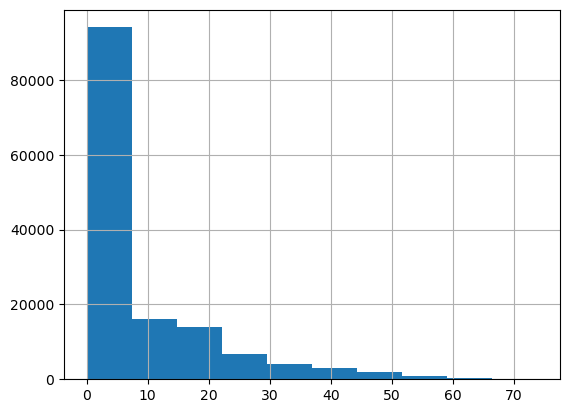

In [5]:
print(df_original["wind_speed"].value_counts())
df_original["wind_speed"].hist()

## Add predictions

In [6]:
from model_function import Load_Model

df = Load_Model("df")
features = Load_Model("features")
xgb_pred = Load_Model("xgb_model").predict(df[features])
# limit predictions to values between 0 and 100
xgb_pred = xgb_pred.clip(0, 100)
df["xgb_pred"] = xgb_pred

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

In [7]:
from model_function import predict2SGGlobal
df["2sg_pred"] = predict2SGGlobal(df[features])
df["2sg_pred"] = df["2sg_pred"].clip(0, 100)
df

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



A val

,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,...,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years,percent_houses_damaged,xgb_pred,2sg_pred
0,-0.704686,1.420347,-0.272376,-1.175524,-1.265043,-0.100972,0.691289,0.852915,1.094009,1.008363,...,-0.352036,0.935205,-0.731012,-1.510670,1.947325,-0.279989,-0.241398,0.0,0.023576,0.023576
1,-0.788156,1.673016,-0.270376,-1.133698,-1.255425,1.106914,0.878330,0.504172,0.893696,0.244915,...,2.853693,0.935205,-0.731012,-1.131296,1.565883,-0.278028,-0.241398,0.0,0.039025,0.039025
2,-0.654702,1.277761,-0.272098,-1.168104,-1.229554,-1.320165,1.784406,2.153799,2.099183,2.653361,...,3.181211,0.935205,-0.731012,-1.212591,1.647621,-0.276812,-0.241398,0.0,0.033377,0.033377
3,-0.700491,1.404514,-0.269193,-1.192053,-1.257415,-0.142657,0.468673,0.648387,0.594333,0.773553,...,2.440864,0.935205,-0.731012,-1.185493,1.620375,-0.265103,-0.241398,0.0,0.042408,0.042408
4,-0.743750,1.531266,-0.237499,-1.188679,-1.272174,-0.350679,0.845817,0.509406,0.791717,0.286700,...,4.370635,0.935205,-0.405585,-0.264156,0.503295,-0.197596,-0.241398,0.0,0.015770,0.015770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49749,-1.064795,1.196675,-0.270872,-0.918833,-1.028225,-1.625712,0.232948,1.047870,0.320292,1.146974,...,-0.546194,0.935205,-0.684523,-1.510670,1.920079,-0.277650,0.534283,0.0,0.053565,0.053565
49750,-1.096719,1.324220,-0.213470,-0.932662,-1.067363,0.234747,-0.731858,-0.467369,-0.742849,-0.426405,...,1.987683,0.935205,-0.498564,-0.995806,1.293424,-0.241674,0.534283,0.0,0.043307,0.043307
49751,-1.132933,1.451765,-0.249755,-0.973477,-1.099370,1.060794,-0.733432,-0.545714,-0.691924,-0.451157,...,0.191214,0.935205,-0.684523,-1.456474,1.865587,-0.241895,0.534283,0.0,0.040439,0.040439
49752,-1.160069,1.579301,-0.271725,-0.677320,-0.994939,-0.409290,-0.717276,-0.989344,-0.597840,-0.822308,...,-0.347840,0.935205,-0.731012,-1.436766,1.873018,-0.273510,0.534283,0.0,0.039136,0.039136


# EDA

In [8]:
# simple statistics of all features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed,49754.0,1.393837e-16,1.000010,-1.710992,-0.704499,-0.305115,0.457031,4.263524
track_distance,49754.0,3.127565e-16,1.000010,-1.736926,-0.866999,0.004237,0.865300,1.854785
total_houses,49754.0,2.284979e-18,1.000010,-0.272381,-0.255304,-0.194078,-0.046133,20.364842
rainfall_max_6h,49754.0,-1.428112e-17,1.000010,-1.283800,-0.721844,-0.245902,0.472565,9.156238
rainfall_max_24h,49754.0,-1.071084e-16,1.000010,-1.364547,-0.754715,-0.205663,0.536592,8.936153
rwi,49754.0,-1.428112e-18,1.000010,-2.398227,-0.721883,-0.100972,0.482417,4.542875
mean_slope,49754.0,3.884464e-17,1.000010,-1.363106,-0.838627,-0.194877,0.629837,3.509511
std_slope,49754.0,9.425538e-17,1.000010,-1.923889,-0.762998,0.119483,0.798976,3.354381
mean_tri,49754.0,-6.569314e-17,1.000010,-1.420829,-0.827618,-0.201608,0.620896,3.831545
std_tri,49754.0,-1.508086e-16,1.000010,-1.879706,-0.740601,0.051817,0.709420,5.098294


In [9]:
df

,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,...,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years,percent_houses_damaged,xgb_pred,2sg_pred
0,-0.704686,1.420347,-0.272376,-1.175524,-1.265043,-0.100972,0.691289,0.852915,1.094009,1.008363,...,-0.352036,0.935205,-0.731012,-1.510670,1.947325,-0.279989,-0.241398,0.0,0.023576,0.023576
1,-0.788156,1.673016,-0.270376,-1.133698,-1.255425,1.106914,0.878330,0.504172,0.893696,0.244915,...,2.853693,0.935205,-0.731012,-1.131296,1.565883,-0.278028,-0.241398,0.0,0.039025,0.039025
2,-0.654702,1.277761,-0.272098,-1.168104,-1.229554,-1.320165,1.784406,2.153799,2.099183,2.653361,...,3.181211,0.935205,-0.731012,-1.212591,1.647621,-0.276812,-0.241398,0.0,0.033377,0.033377
3,-0.700491,1.404514,-0.269193,-1.192053,-1.257415,-0.142657,0.468673,0.648387,0.594333,0.773553,...,2.440864,0.935205,-0.731012,-1.185493,1.620375,-0.265103,-0.241398,0.0,0.042408,0.042408
4,-0.743750,1.531266,-0.237499,-1.188679,-1.272174,-0.350679,0.845817,0.509406,0.791717,0.286700,...,4.370635,0.935205,-0.405585,-0.264156,0.503295,-0.197596,-0.241398,0.0,0.015770,0.015770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49749,-1.064795,1.196675,-0.270872,-0.918833,-1.028225,-1.625712,0.232948,1.047870,0.320292,1.146974,...,-0.546194,0.935205,-0.684523,-1.510670,1.920079,-0.277650,0.534283,0.0,0.053565,0.053565
49750,-1.096719,1.324220,-0.213470,-0.932662,-1.067363,0.234747,-0.731858,-0.467369,-0.742849,-0.426405,...,1.987683,0.935205,-0.498564,-0.995806,1.293424,-0.241674,0.534283,0.0,0.043307,0.043307
49751,-1.132933,1.451765,-0.249755,-0.973477,-1.099370,1.060794,-0.733432,-0.545714,-0.691924,-0.451157,...,0.191214,0.935205,-0.684523,-1.456474,1.865587,-0.241895,0.534283,0.0,0.040439,0.040439
49752,-1.160069,1.579301,-0.271725,-0.677320,-0.994939,-0.409290,-0.717276,-0.989344,-0.597840,-0.822308,...,-0.347840,0.935205,-0.731012,-1.436766,1.873018,-0.273510,0.534283,0.0,0.039136,0.039136


array([[<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'track_distance'}>,
        <Axes: title={'center': 'total_houses'}>,
        <Axes: title={'center': 'rainfall_max_6h'}>,
        <Axes: title={'center': 'rainfall_max_24h'}>],
       [<Axes: title={'center': 'rwi'}>,
        <Axes: title={'center': 'mean_slope'}>,
        <Axes: title={'center': 'std_slope'}>,
        <Axes: title={'center': 'mean_tri'}>,
        <Axes: title={'center': 'std_tri'}>],
       [<Axes: title={'center': 'mean_elev'}>,
        <Axes: title={'center': 'coast_length'}>,
        <Axes: title={'center': 'with_coast'}>,
        <Axes: title={'center': 'urban'}>,
        <Axes: title={'center': 'rural'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'total_pop'}>,
        <Axes: title={'center': 'percent_houses_damaged_5years'}>,
        <Axes: title={'center': 'percent_houses_damaged'}>,
        <Axes: title={'center': 'xgb_pred'}>],
       [<Axes: tit

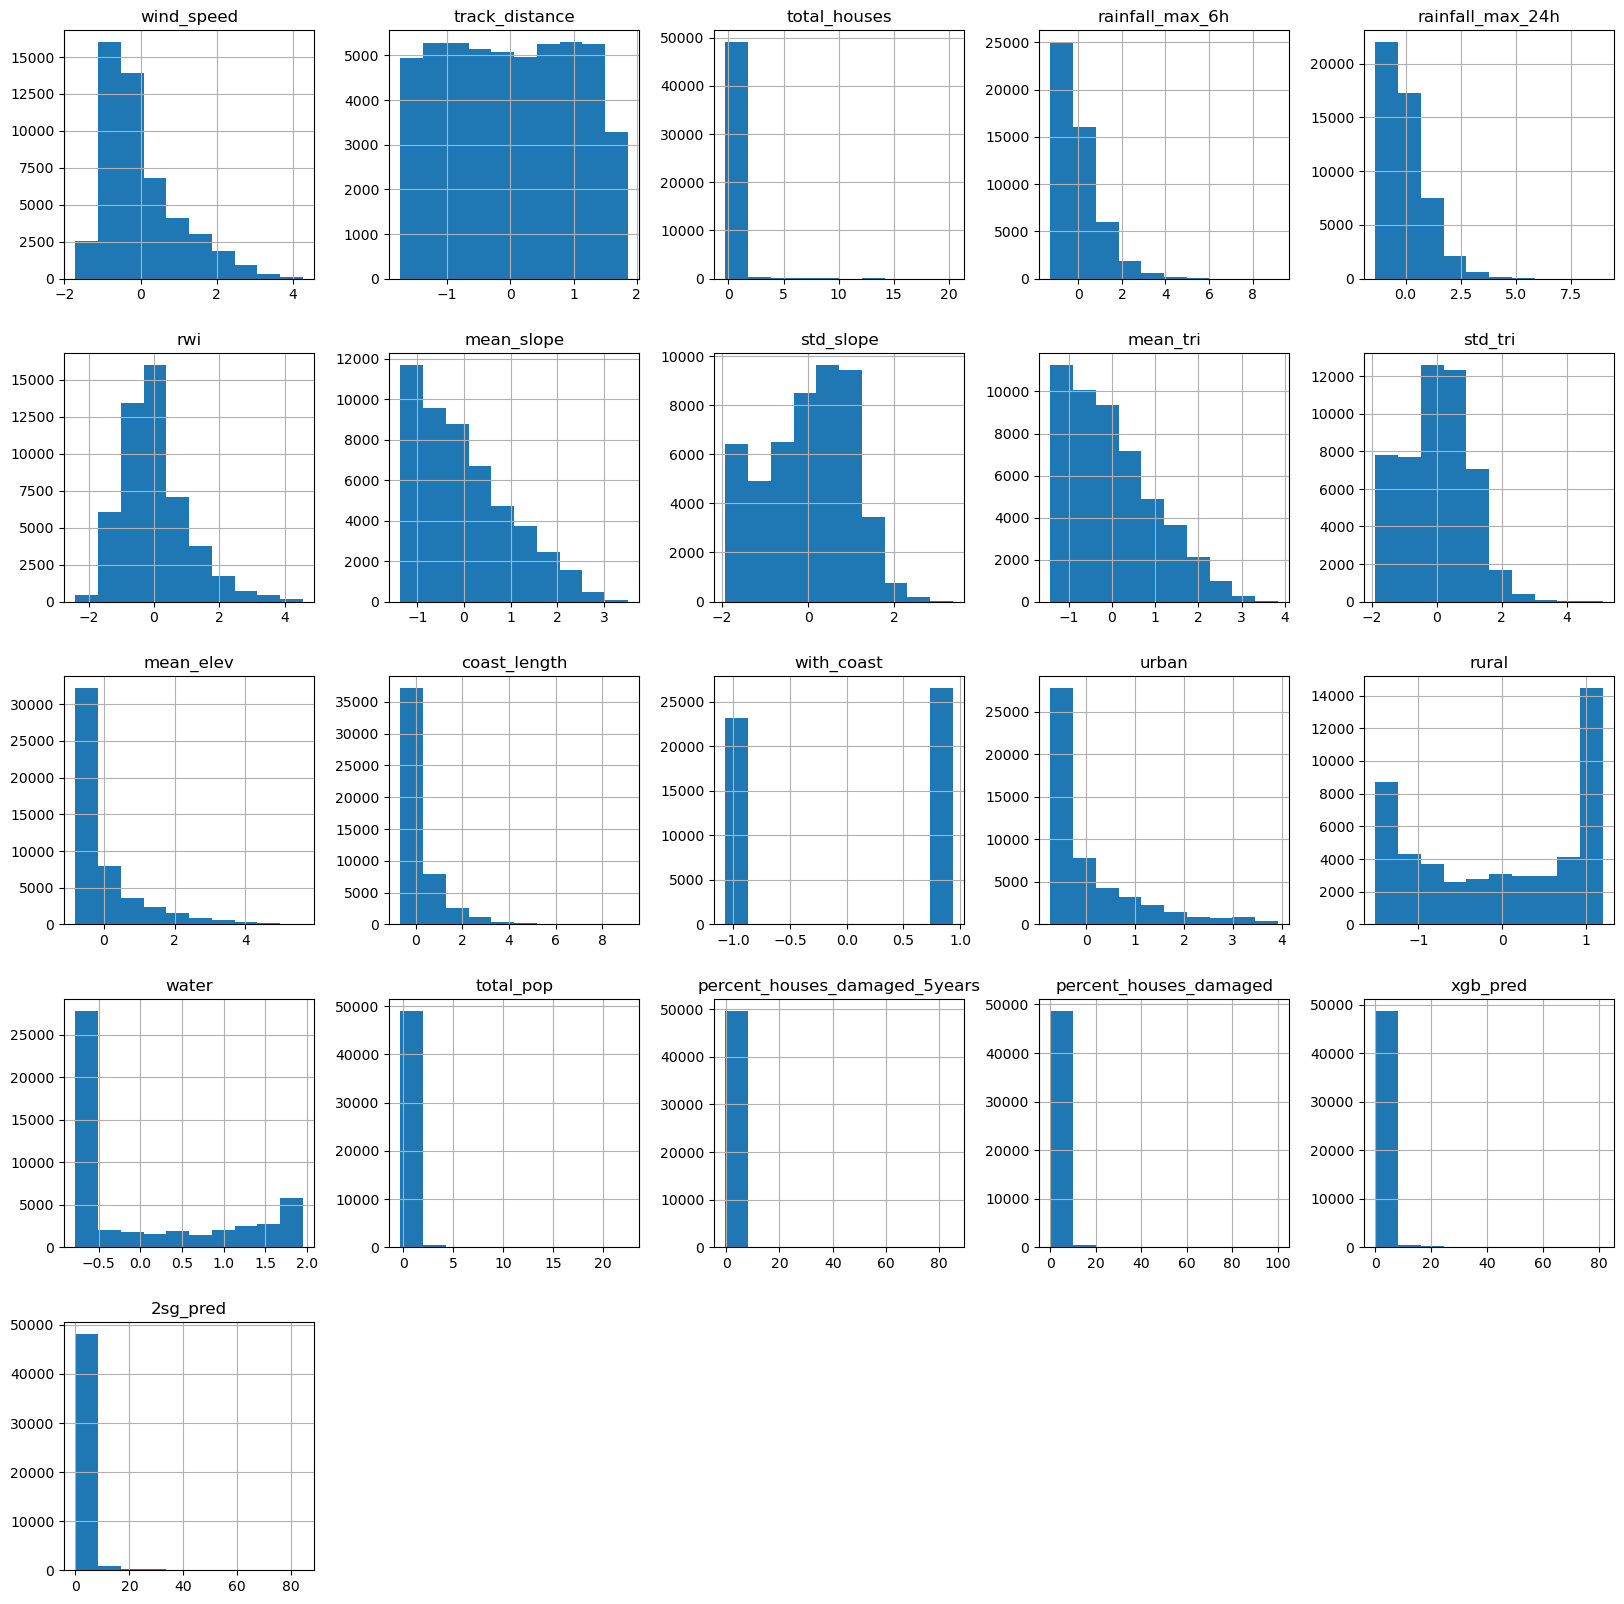

In [10]:
df.hist(figsize=(20, 20))

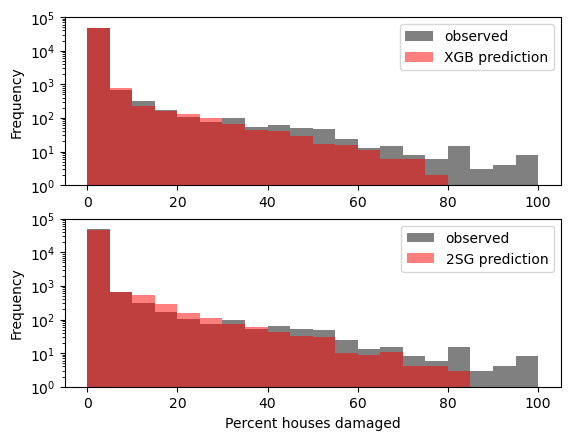

In [11]:
plt.subplot(2, 1, 1)
# overlapping histograms of predictions
_, bins, _ = plt.hist(df["percent_houses_damaged"], bins=20, label = "observed", color= "gray")#, normed=True)

plt.hist(df["xgb_pred"], bins=bins, alpha=0.5, label="XGB prediction", color="red")
plt.yscale("log")
plt.ylim(1, 1e5)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(2, 1, 2)
_, bins, _ = plt.hist(df["percent_houses_damaged"], bins=20, label = "observed", color= "gray")
plt.hist(df["2sg_pred"], bins=bins, alpha=0.5, label="2SG prediction", color = "red")
plt.yscale("log")
plt.xlabel("Percent houses damaged")
plt.ylabel("Frequency")
plt.ylim(1, 1e5)
plt.legend()

# overall title
# plt.suptitle("Comparison of observed and predicted percent houses damaged")

In [12]:
# Skewness parameters
print("Skewness of observed data: ", df["percent_houses_damaged"].skew())
print("Skewness of XGB predictions: ", df["xgb_pred"].skew())
print("Skewness of 2SG predictions: ", df["2sg_pred"].skew())

# Kurtosis parameters
print("Kurtosis of observed data: ", df["percent_houses_damaged"].kurt())
print("Kurtosis of XGB predictions: ", df["xgb_pred"].kurt())
print("Kurtosis of 2SG predictions: ", df["2sg_pred"].kurt())


Skewness of observed data:  9.93553052577328
Skewness of XGB predictions:  9.6244135
Skewness of 2SG predictions:  8.444001
Kurtosis of observed data:  120.67263802502417
Kurtosis of XGB predictions:  115.97961
Kurtosis of 2SG predictions:  91.36108


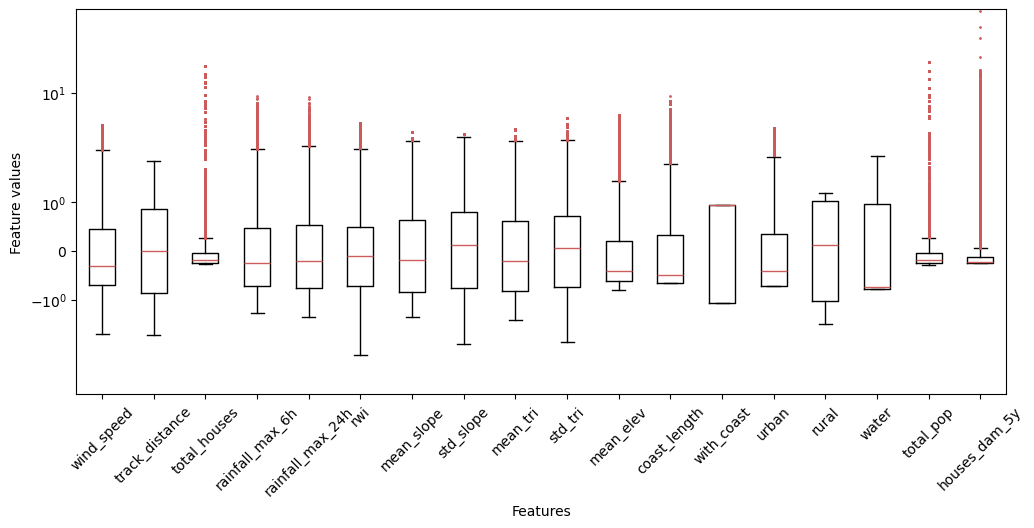

In [13]:
import matplotlib.pyplot as plt

# Assuming 'data' is your data
data = df[features]

flierprops = dict(marker='o', markerfacecolor='darkred', markersize=1,
                  linestyle='none', markeredgecolor='indianred')

plt.figure(figsize=(12, 5))

labels = features[0:17]#
labels.append("houses_dam_5y")
plt.boxplot(data, flierprops=flierprops, medianprops=dict(color="indianred"), labels=labels)

plt.xticks(rotation=45)
plt.yscale('symlog')
#plt.title('Boxplot with outliers')
plt.ylabel('Feature values')
plt.xlabel('Features')

plt.show()

In [14]:
from model_function import eval_bins
# including train set!


eval_bins(df["xgb_pred"], df["percent_houses_damaged"], df["percent_houses_damaged"])
print()
eval_bins(df["2sg_pred"], df["percent_houses_damaged"], df["percent_houses_damaged"])

Bin: [0, 9e-05]      RMSE: 0.825, Avg. Error: 0.180
Bin: [9e-05, 1]      RMSE: 1.720, Avg. Error: 0.670
Bin: [1, 10]         RMSE: 4.183, Avg. Error: -0.190
Bin: [10, 50]        RMSE: 13.504, Avg. Error: -8.168
Bin: [50, 100]       RMSE: 31.278, Avg. Error: -23.432
Total RSME 2.8428871841305186
Total Avg. Error 0.008748947582953272

Bin: [0, 9e-05]      RMSE: 0.916, Avg. Error: 0.190
Bin: [9e-05, 1]      RMSE: 1.941, Avg. Error: 0.727
Bin: [1, 10]         RMSE: 4.504, Avg. Error: 0.260
Bin: [10, 50]        RMSE: 9.237, Avg. Error: -3.508
Bin: [50, 100]       RMSE: 25.175, Avg. Error: -18.352
Total RSME 2.380073025053187
Total Avg. Error 0.14935567425351337


[[[0, 9e-05],
  0.8393219636543289,
  0.9161451651645218,
  0.190215185906362,
  0.19021509861658095],
 [[9e-05, 1],
  3.7669743976776062,
  1.9408694952720562,
  0.8170191968595583,
  0.7265412258864321],
 [[1, 10],
  20.28542693365481,
  4.503934605836858,
  3.046062884607893,
  0.26031372145160697],
 [[10, 50],
  85.31998851077174,
  9.23688196908306,
  6.900073732392433,
  -3.5076073453876813],
 [[50, 100],
  633.7585476339647,
  25.174561518206524,
  18.800534158022938,
  -18.351703491290877]]

## X_test predictions

In [15]:
# X_test predictions
from model_function import Load_Model, predict2SGGlobal, eval_bins
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

X_test = Load_Model("X_test")
y_test = Load_Model("y_test")

xgb = Load_Model("xgb_model")
xgb_pred_test = xgb.predict(X_test)
xgb_pred_test = xgb_pred_test.clip(0, 100)

xgb2sg_pred_test = predict2SGGlobal(X_test)
xgb_pred_test = xgb_pred_test.clip(0, 100)

eval_bins(xgb_pred_test, y_test, y_test)
print()
eval_bins(xgb2sg_pred_test, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.135, Avg. Error: 0.203
Bin: [9e-05, 1]      RMSE: 1.999, Avg. Error: 0.738
Bin: [1, 10]         RMSE: 4.687, Avg. Error: 0.051
Bin: [10, 50]        RMSE: 14.226, Avg. Error: -8.132
Bin: [50, 100]       RMSE: 41.210, Avg. Error: -34.199
Total RSME 3.3802282244870336
Total Avg. Error 0.01807192193535208

Bin: [0, 9e-05]      RMSE: 1.304, Avg. Error: 0.223
Bin: [9e-05, 1]      RMSE: 2.448, Avg. Error: 0.848
Bin: [1, 10]         RMSE: 5.664, Avg. Error: 0.942
Bin: [10, 50]        RMSE: 12.772, Avg. Error: -5.649
Bin: [50, 100]       RMSE: 40.566, Avg. Error: -33.450
Total RSME 3.41676255835388
Total Avg. Error 0.1434384221209976


[[[0, 9e-05],
  1.7011312588820184,
  1.3042742268717948,
  0.22291440339381727,
  0.22291432488471782],
 [[9e-05, 1],
  5.991215591889896,
  2.4476959761967776,
  0.9399746632754077,
  0.848448172171337],
 [[1, 10],
  32.08655942473851,
  5.6644999271549565,
  3.601272261560735,
  0.9421235166916919],
 [[10, 50],
  163.13212200120623,
  12.772318583609094,
  9.779390858150503,
  -5.648942261930251],
 [[50, 100],
  1645.6188522984353,
  40.56622797720335,
  33.673321868107756,
  -33.45003066429823]]

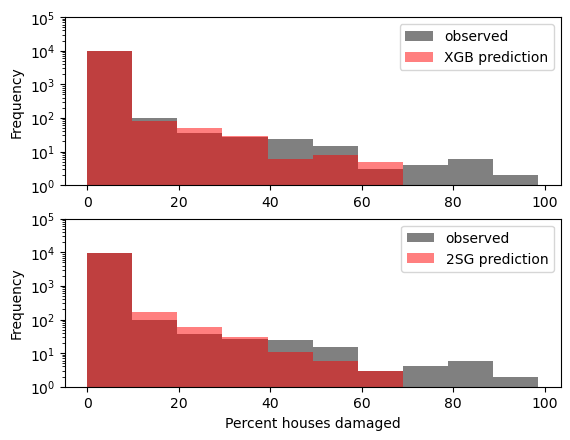

In [16]:
import matplotlib.pyplot as plt 
plt.subplot(2, 1, 1)
# overlapping histograms of predictions
_, bins, _ = plt.hist(y_test, bins=10, label = "observed", color= "gray")#, normed=True)

plt.hist(xgb_pred_test, bins=bins, alpha=0.5, label="XGB prediction", color="red")
plt.yscale("log")
plt.ylim(1, 1e5)
plt.ylabel("Frequency")
plt.legend()

plt.subplot(2, 1, 2)
_, bins, _ = plt.hist(y_test, bins=10, label = "observed", color= "gray")
plt.hist(xgb2sg_pred_test, bins=bins, alpha=0.5, label="2SG prediction", color = "red")
plt.yscale("log")
plt.xlabel("Percent houses damaged")
plt.ylabel("Frequency")
plt.ylim(1, 1e5)
plt.legend()

(0.0, 100.0)

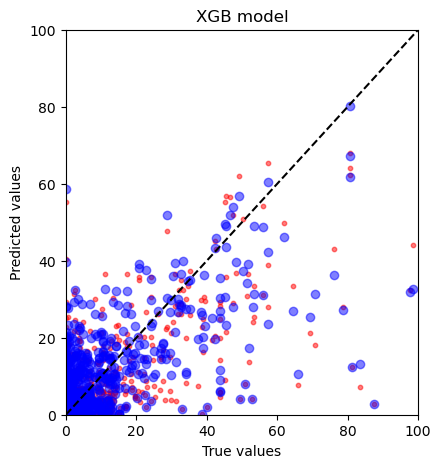

In [19]:
# scatterplot of true vs predicted values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_pred_test, color="red", alpha=0.5, s=10)
plt.scatter(y_test, xgb2sg_pred_test, color="blue", alpha=0.5)
plt.plot([0, 100], [0, 100], "--", color="black")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("XGB model")
plt.xlim(0, 100)
plt.ylim(0, 100)
